## Component objective

This component is designed to provide a business user with a soft understanding of how customers can be viewed as a certain group based on some common characteristics. Upon the successful execution of this analysis, a user would be able to make conclusions, through descriptive analysis findings, about where do the current rewards offerings stand in terms of success rate, influence rate, etc. 

Methodology to be examined:
- Common EDA techniques such as comparing customer group distributions, grouped by tables, bar charts, and density graphs. 

## Table of contents

1. Descriptive analysis
    - Data loading
    - Profile dataset initial analysis
    - Transcript dataset initial analysis
2. Cross dataset analysis
    - EDA on the joined dataset from portfolio and transcript
    - EDA on the joined dataset from profile and transcript

## 1. Descriptive analysis

### 1.0 Data loading

In [5]:
# import libraries

import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [6]:
# read in the json files

portfolio = pd.read_json('C:/Users/607991/Desktop/Starbucks Capstone/Data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('C:/Users/607991/Desktop/Starbucks Capstone/Data/profile.json', orient='records', lines=True)
transcript = pd.read_json('C:/Users/607991/Desktop/Starbucks Capstone/Data/transcript.json', orient='records', lines=True)

### 1.1 Initial analysis - profile

In [7]:
# first glance

display(profile.head(10))
display(profile.info())

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


None

- We have total of 17000 unique individuals, 4 numeric features, and 1 categorical feature
- 'gender' and 'income' contain missing values. Since both columns has the exact same number of missig values, it is suspected that these missing values are associated with each other, meaning, whenever a record that has missing gender info, it also has missing income info.

In [8]:
# set customer id as index

profile.set_index('id', inplace=True)

# numeric features

display(profile.describe().T, profile.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
age,17000.0,6.253141e+01,26.738580,18.0,45.0,58.0,73.0,118.0
became_member_on,17000.0,2.016703e+07,11677.499961,20130729.0,20160526.0,20170802.0,20171230.0,20180726.0
income,14825.0,6.540499e+04,21598.299410,30000.0,49000.0,64000.0,80000.0,120000.0


,count,unique,top,freq
gender,14825,3,M,8484


- We observe that the max value for the age column is 118, this is noted in the provided dataset info. Whenever there is a missing value in the age column, 118 is used as a replacement.

Male population is: 8484 , 49.91 percent of the total customers
Female population is: 6129 , 36.05 percent of the total customers 

Missing gender population is: 2175 , 12.79 percent of the total customers
Missing income population is: 2175 , 12.79 percent of the total customers


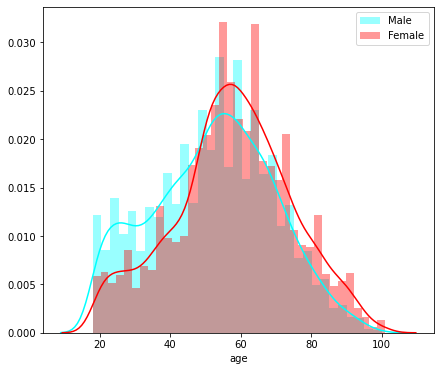

In [9]:
# demographics based on age, income, and gender

fig, ax =plt.subplots(figsize=(7,6))
sns.distplot( profile.loc[profile["gender"]=='M', 'age'] , color="cyan", label="Male", ax=ax)
sns.distplot( profile.loc[profile["gender"]=='F', 'age'] , color="red", label="Female", ax=ax)
plt.legend()

print('Male population is:', len(profile.query('gender=="M"')), ', %.2f percent of the total customers' % (len(profile.query('gender=="M"'))/profile.shape[0]*100))
print('Female population is:', len(profile.query('gender=="F"')), ', %.2f percent of the total customers' % (len(profile.query('gender=="F"'))/profile.shape[0]*100),'\n')
print('Missing gender population is:', profile.gender.isnull().sum(), ', %.2f percent of the total customers' % (profile.gender.isnull().sum()/profile.shape[0]*100))
print('Missing income population is:', profile.income.isnull().sum(), ', %.2f percent of the total customers' % (profile.income.isnull().sum()/profile.shape[0]*100))

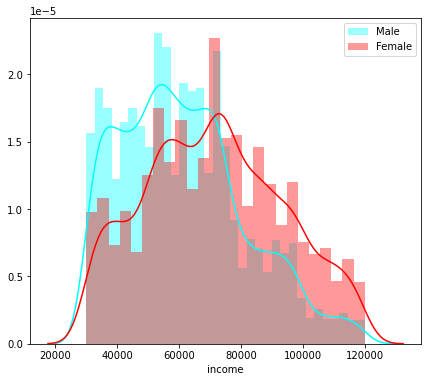

In [10]:
fig, ax =plt.subplots(figsize=(7,6))
sns.distplot( profile.loc[profile["gender"]=='M', 'income'] , color="cyan", label="Male", ax=ax)
sns.distplot( profile.loc[profile["gender"]=='F', 'income'] , color="red", label="Female", ax=ax)
plt.legend()

- Almost 50% of the data population is male, while 36% is female, and 12.8% doesn't have gender info.
- The age column follows a almost perfect bell curve centered around at 60 for both female and male population. It's observed that blow the age of 50, there is more male population is larger than the female population.
- The income column has a couple local peaks, which are around about \\$58,000, and \\$75,000. It's observed that the male population is larger than the female population when the income level belows \\$70,000. 

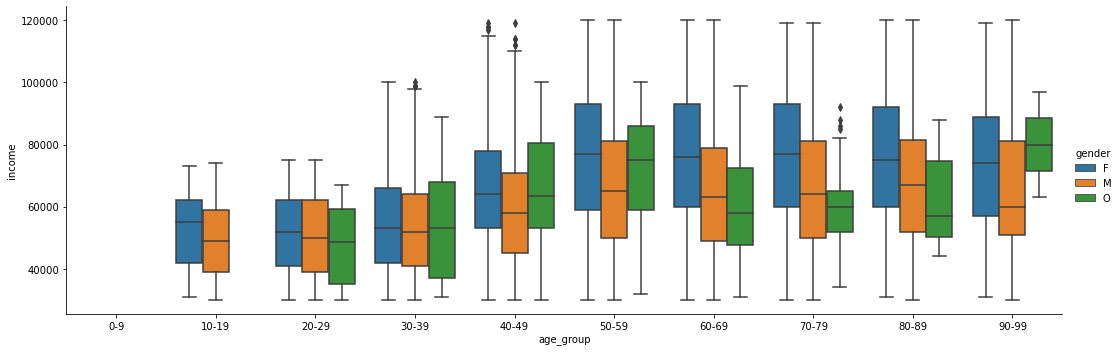

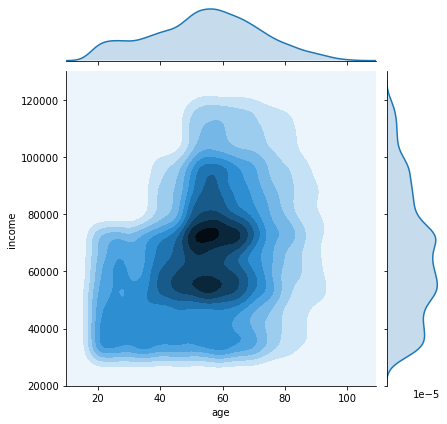

In [11]:
# age vs. income

labels = ["{0}-{1}".format(i, i+9) for i in range(0,100,10)]
profile['age_group'] = pd.cut(profile.age, range(0,101,10), right=False, labels=labels)

sns.catplot(x="age_group", y="income", hue="gender", kind="box", data=profile, height=5, aspect=3)
sns.jointplot(x="age", y="income", data=profile, kind='kde')

- For the female population, the median income is higher then that of the rest of the groups across all age groups.
- For both female and male, the most population has their age centers around age 50-70, and income centers just under \\$60,000 and \\$70,000. This is in sync with previous observations.

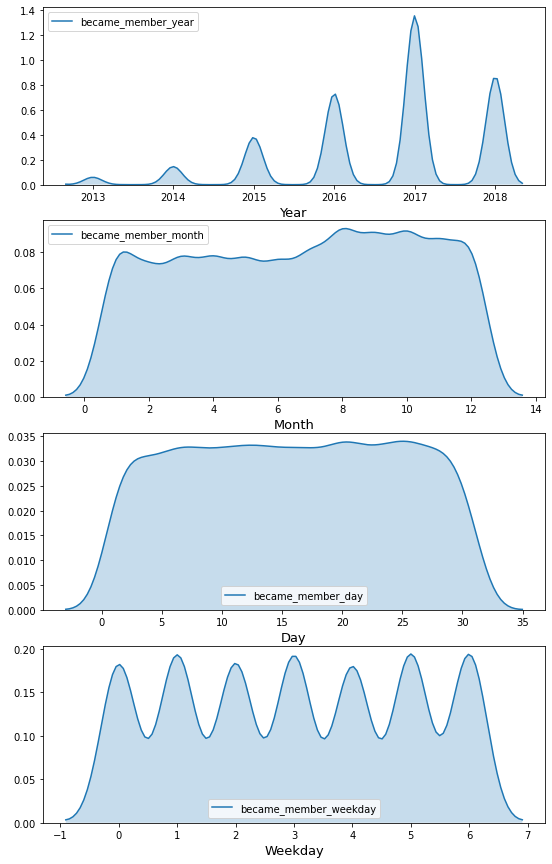

In [12]:
# analyze time variable

profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['became_member_year'] = profile.became_member_on.dt.year
profile['became_member_month'] = profile.became_member_on.dt.month
profile['became_member_day'] = profile.became_member_on.dt.day
profile['became_member_weekday'] = profile.became_member_on.dt.weekday

fig, ax =plt.subplots(4,1, figsize=(9,15))
a = sns.kdeplot(profile['became_member_year'], ax=ax[0], shade=True)
b = sns.kdeplot(profile['became_member_month'], ax=ax[1], shade=True)
c = sns.kdeplot(profile['became_member_day'], ax=ax[2], shade=True)
d = sns.kdeplot(profile['became_member_weekday'], ax=ax[3], shade=True)
a.set_xlabel("Year",fontsize=13)
b.set_xlabel("Month",fontsize=13)
c.set_xlabel("Day",fontsize=13)
d.set_xlabel("Weekday",fontsize=13)
fig.show()

- We see a steady growth trend in terms of membership sign-ups. Year of 2017 is the peak among all years, 2018 shows a decay but still remains higher then year 2016. 
- There is no particular date, or weekday that has the highest number of sign-ups. However, there is a slight bump with number of sign-ups during the fall/winter months (Aug - Dec). 

### 1.1 Initial conclusion - profile

Summary:
- We have total of 17000 unique individuals, 4 numeric features, and 1 categorical feature
- 'gender' and 'income' contain missing values. Since both columns has the exact same number of missig values, it is suspected that these missing values are associated with each other, meaning, whenever a record that has missing gender info, it also has missing income info.
- We observe that the max value for the age column is 118, this is noted in the provided dataset info. Whenever there is a missing value in the age column, 118 is used as a replacement.
- Almost 50% of the data population is male, while 36% is female, and 12.8% doesn't have gender info.
- The age column follows a almost perfect bell curve centered around at 60 for both female and male population. It's observed that blow the age of 50, there is more male population is larger than the female population.
- The income column has a couple local peaks, which are around about \\$58,000, and \\$75,000. It's observed that the male population is larger than the female population when the income level is below \\$70,000. 
- For the female population, the median income is higher then that of male customers across all age groups.
- For both female and male, the most population has their age centers around age 50-70, and income centers just under \\$60,000 and \\$70,000. This is in sync with the previous observations.
- We see a steady growth trend in terms of membership sign-ups. Year of 2017 is the peak among all years, 2018 shows a decay but still remains higher then year 2016. 
- There is no particular date, or weekday that has the highest number of sign-ups. However, there is a slight bump with number of sign-ups during the fall/winter months (Aug - Dec). 

Conclusion:
1. gender and age: 
    - There are 17000 unique customers. While half of them are male, about 36% are female and the rest are labeled as NAN in the gender column. Both male and female population are around 55-60 years old. However, the male population is moderately younger than the female population due to the fact that there are more males under the age of 50 than that of the females.
2. income:
    - It's observed that there are more males who make less than about \\$70,000 than that of females, while the opposite is true when considering people who make more than \\$70,000. In addition, the median income of the female group is higher than that of the male's across all age groups. When pass the age of 50, it is shown that female tend to have a higher income than male do by a large margin. 
    - It's concluded that the female group while may be moderately older than the male group, they are very likely to have a higher income than the male customers.
3. membership sign-ups:
    - It's observed that the number of membership sign-ups has shown a steady increase in recent years. Winter months might play a role in membership sign-ups due to the potential effect of holiday seasons.

### 1.2 Initial analysis - transcript

In [13]:
# transcript

display(transcript.head(10), transcript.shape)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


(306534, 4)

The total number of events in this dataset is: 306534
The total number of people in this dataset: 306534, which means people included in this dataset must be assigned to an event.
Please note that we have total of 17000 unique customers obtained from the profile dataset. 

The following are the counts for each type of events from this dataset 
 transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64 



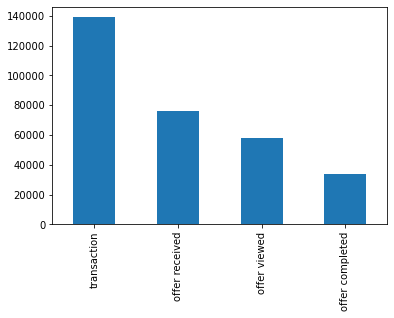

In [14]:
# basic statistics

print('The total number of events in this dataset is: %.0f' % transcript.event.value_counts().sum())
print('The total number of people in this dataset: %.0f, which means people included in this dataset must be assigned to an event.' % len(transcript.person))
print('Please note that we have total of 17000 unique customers obtained from the profile dataset.', '\n')
print('The following are the counts for each type of events from this dataset', '\n', transcript.event.value_counts(), '\n')

transcript.event.value_counts().plot.bar()

In [15]:
# unpack the value column

transcript = transcript.join(pd.DataFrame.from_records(transcript.pop('value')))
transcript.offer_id.update(transcript.pop('offer id'))
transcript.head()

,event,person,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [12]:
# scenarios 1 - offer received, there is offer id, but amount and reward is nan

display(transcript.query('event == "offer received"').head())

# scenarios 2 - offer viewd, there is offer id, but amount and reward is nan

display(transcript.query('event == "offer viewed"').head())

# scenarios 3 - transaction, there is amount, but offer id and reward is nan

display(transcript.query('event == "transaction"').head())

# scenarios 4 - offer completed, there is reward and offer id, but amount is nan

display(transcript.query('event == "offer completed"').head())


,event,person,time,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


,event,person,time,amount,offer_id,reward
12650,offer viewed,389bc3fa690240e798340f5a15918d5c,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN
12651,offer viewed,d1ede868e29245ea91818a903fec04c6,0,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN
12652,offer viewed,102e9454054946fda62242d2e176fdce,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN
12653,offer viewed,02c083884c7d45b39cc68e1314fec56c,0,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN
12655,offer viewed,be8a5d1981a2458d90b255ddc7e0d174,0,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN


,event,person,time,amount,offer_id,reward
12654,transaction,02c083884c7d45b39cc68e1314fec56c,0,0.83,NaN,NaN
12657,transaction,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56,NaN,NaN
12659,transaction,54890f68699049c2a04d415abc25e717,0,13.23,NaN,NaN
12670,transaction,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51,NaN,NaN
12671,transaction,fe97aa22dd3e48c8b143116a8403dd52,0,18.97,NaN,NaN


,event,person,time,amount,offer_id,reward
12658,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,NaN,2906b810c7d4411798c6938adc9daaa5,2.0
12672,offer completed,fe97aa22dd3e48c8b143116a8403dd52,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0
12679,offer completed,629fc02d56414d91bca360decdfa9288,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0
12692,offer completed,676506bad68e4161b9bbaffeb039626b,0,NaN,ae264e3637204a6fb9bb56bc8210ddfd,10.0
12697,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0


- offer id and amount are mutually exclusive, meaning that whenever there is an offer id, the amount has to be nan. offer id is associated with offer received, offer viewed, and offer completed.
- reward is only associated with offer complete.
- amount is only associated with transaction; in addition, amount and reward are mutually exclusive.
- we need to take these scenarios into consideration from now on.

Text(0.5, 0, 'spend amount')

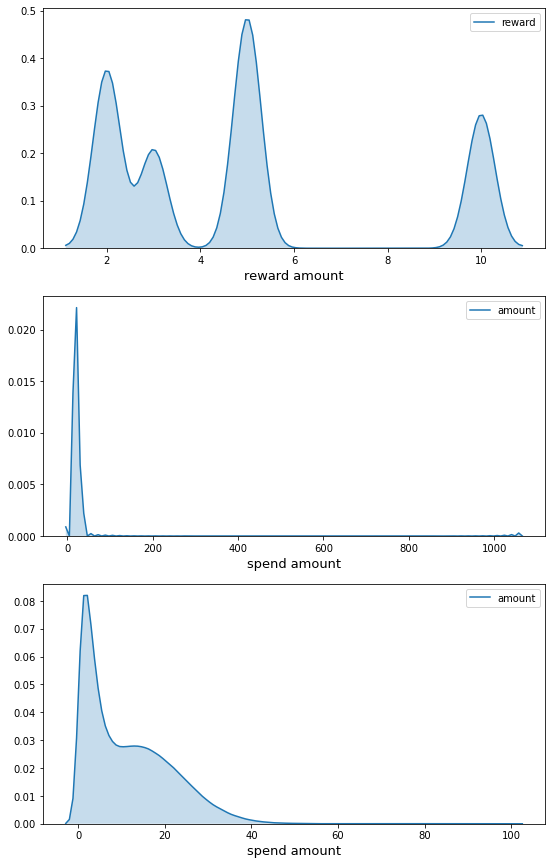

In [13]:
# plot population density distribution by rewards amount, and spend amount

fig, ax =plt.subplots(3,1, figsize=(9,15))
a = sns.kdeplot(transcript['reward'], ax=ax[0], shade=True)
b = sns.kdeplot(transcript['amount'], ax=ax[1], shade=True)
c = sns.kdeplot(transcript.loc[transcript['amount']<100, 'amount'], ax=ax[2], shade=True)
a.set_xlabel("reward amount",fontsize=13)
b.set_xlabel("spend amount",fontsize=13)
c.set_xlabel("spend amount",fontsize=13)

- From most frequent to least frequent, the rewards amount to each individual person are \\$5 dollars, followed by \\$2, then \\$10 dollars.
- For a single tranaction, there are more customers who spent less than about \\$10 dollars, and less customers who spend more than about \\$20 dollars. Please note that these numbers are the results of only looking at tranactions one at a time. If a customer who spent \\$10 dollars today and \\$20 dollars tomorrow, these transactions will be viewed as two different transactions.

person
94de646f7b6041228ca7dec82adb97d2    45
8dbfa485249f409aa223a2130f40634a    44
79d9d4f86aca4bed9290350fb43817c2    43
d0a80415b84c4df4908b8403b19765e3    42
5e60c6aa3b834e44b822ea43a3efea26    42
b1f4ece7d49342628a9ed77aee2cde58    41
28681c16026943e68f26feaccab0907f    40
a42ed50acc4d4b25bca647c9e0b916ad    40
bd2cdd691aca4bb0a0e039979ee5de5c    40
ab25fd6fbd5040f880751921e4029757    39
Name: event, dtype: int64

person
d727102ac242449ab15f1bd1af28e6ff    1
a33e1e7f26ea4b9a824bf1902ee073fc    1
0b8684abe074418d9ec08eee090f1859    1
f89cde99c9bf4182a371dd808a0ad2f1    1
3045af4e98794a04a5542d3eac939b1f    1
45893c3890f14906a2143e55fd3cbf6f    1
2cd61834c34d4127b161568aa8104d10    1
f173f2b63b5c474fbaf848f60a8f38cf    1
c3f3b8193c8a4133b8bd0654f82654a1    1
b52302342d674c9784218a66bf550cca    1
Name: event, dtype: int64

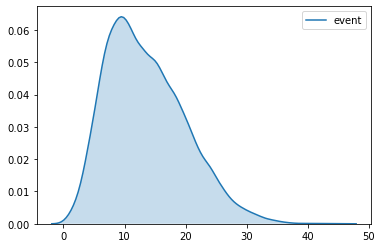

In [14]:
# top 10 most/least active customers
# "active" is defined as number of actions are being made after received an offer
# plot the total number of events density distribution 
# note that the total number of events for each person could be: offer viewd, transaction, offer completed
# we purposely exclude the event type "offer received" because this is a passive action, so it has no further required actions

display(transcript.query('event != "offer received"').groupby('person').count().sort_values(by='event',ascending=False)['event'][:10])
display(transcript.query('event != "offer received"').groupby('person').count().sort_values(by='event',ascending=True)['event'][:10])

sns.kdeplot(transcript.query('event != "offer received"').groupby('person').count().sort_values(by='event',ascending=False)['event'], shade=True)

- In terms of the type of events (opened, transaction, completed) that could happen to a customer, there are customers who initiated as many as 45 such events, and there are customers who initiated as less as 1 such event.
- The majority of the population initiate about 10 events, all types of events are considered except "offer received" since this is a passive action. 

person
ffff82501cea40309d5fdd7edcca4a07    6
c509fe1f9c464c4881d158f453491d23    6
4e61c5266747430e950bbdb0e522722b    6
295698c734bb4aa9a77b8986670d723f    6
bf6849a39d3640069a65f44f8b01f5da    6
84f92efc819047ec88e3544570c8da30    6
29655cba61a04d079efde18203b4f232    6
bf4798648cf446e6b0e8d6ead888aacd    6
850e5abd6b5346708926727e82579e94    6
bf3292eafc2f468ea68d4f5b0e8fa35a    6
Name: offer_id, dtype: int64

person
8cded7272788493a8e71cf419722b66a    1
22617705eec442e0b7b43e5c5f56fb17    1
fecbf0774931488781713494b726a121    1
2dd5daa8a5e14fcd8fca67457541fc48    1
9acbb111ba2f452cbbafabaf49138377    1
f6f3412fccea4ca7a15724586ef0e792    1
cb8291d29fcd482b8793aa18c970a71b    1
14b3fa95de4f404a8c46709ef16ec58f    1
f126206918334d3ea43168faa612e277    1
01fe5ec668f241608eb2f7ec374cb1b7    1
Name: offer_id, dtype: int64

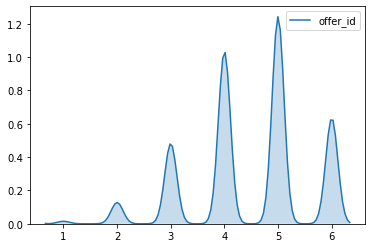

In [15]:
# top 10 customers that receive the most/least number of offers
# plot the density distribution of total number of offers being sent
# note that we only consider the scenario of offer type being "offer received" for each person because all offers must be
# initially sent to customers first in order for them to bring actions

display(transcript.query('event=="offer received"').groupby('person').count().sort_values(by='offer_id',ascending=False)['offer_id'][:10])
display(transcript.query('event=="offer received"').groupby('person').count().sort_values(by='offer_id',ascending=True)['offer_id'][:10])

sns.kdeplot(transcript.query('event=="offer received"').groupby('person').count().sort_values(by='offer_id',ascending=False)['offer_id'], shade=True)

- In terms of the number of offers received, some people got as many as 6, while others got as less as 1.
- The majority of the population receives either 4 or 5 offers during the data gathering period.

offer_id
9b98b8c7a33c4b65b9aebfe6a799e6d9    7677
0b1e1539f2cc45b7b9fa7c272da2e1d7    7668
ae264e3637204a6fb9bb56bc8210ddfd    7658
2298d6c36e964ae4a3e7e9706d1fb8c2    7646
2906b810c7d4411798c6938adc9daaa5    7632
5a8bc65990b245e5a138643cd4eb9837    7618
3f207df678b143eea3cee63160fa8bed    7617
fafdcd668e3743c1bb461111dcafc2a4    7597
4d5c57ea9a6940dd891ad53e9dbe8da0    7593
f19421c1d4aa40978ebb69ca19b0e20d    7571
Name: person, dtype: int64

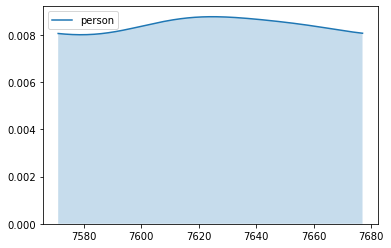

In [16]:
# top 5 most/least popular offers that got sent to the customers
# note that we only want to consider event type being "offer received" because when a customer made futher actions after viewing
# the offers, we don't want to double count the customer as two different people

display(transcript.query('event == "offer received"').groupby('offer_id').count().sort_values(by='person',ascending=False)['person'][:10])
sns.kdeplot(transcript.query('event == "offer received"').groupby('offer_id').count().sort_values(by='person',ascending=False)['person'], shade=True, cut=0)

- There is no one particular offer that is being sent significantly more often then all others due to the rather flat curve we observe from above.

offer_id
fafdcd668e3743c1bb461111dcafc2a4    5317
2298d6c36e964ae4a3e7e9706d1fb8c2    5156
9b98b8c7a33c4b65b9aebfe6a799e6d9    4354
f19421c1d4aa40978ebb69ca19b0e20d    4296
2906b810c7d4411798c6938adc9daaa5    4017
ae264e3637204a6fb9bb56bc8210ddfd    3688
0b1e1539f2cc45b7b9fa7c272da2e1d7    3420
4d5c57ea9a6940dd891ad53e9dbe8da0    3331
Name: event, dtype: int64

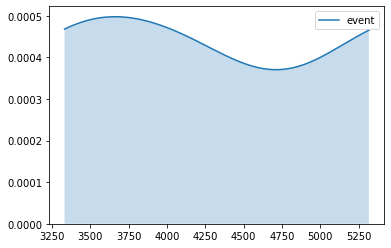

In [17]:
# Top 5 offers that most completions (exclude infomational offers)

info_offers = portfolio.query('offer_type == "informational"').id.values.tolist()
display(transcript.query('offer_id not in @info_offers and event == "offer completed"').groupby('offer_id').count().sort_values(by='event',ascending=False)['event'][:10])
sns.kdeplot(transcript.query('offer_id not in @info_offers and event == "offer completed"').groupby('offer_id').count().sort_values(by='event',ascending=False)['event'], shade=True, cut=0)

- Offers that got completed the most times are "fafdcd668e3743c1bb461111dcafc2a4", and "2298d6c36e964ae4a3e7e9706d1fb8c2", with 5317 completions and 5156 completions repectively.

offer_id
ae264e3637204a6fb9bb56bc8210ddfd    36880.0
4d5c57ea9a6940dd891ad53e9dbe8da0    33310.0
9b98b8c7a33c4b65b9aebfe6a799e6d9    21770.0
f19421c1d4aa40978ebb69ca19b0e20d    21480.0
0b1e1539f2cc45b7b9fa7c272da2e1d7    17100.0
2298d6c36e964ae4a3e7e9706d1fb8c2    15468.0
fafdcd668e3743c1bb461111dcafc2a4    10634.0
2906b810c7d4411798c6938adc9daaa5     8034.0
3f207df678b143eea3cee63160fa8bed        0.0
5a8bc65990b245e5a138643cd4eb9837        0.0
Name: reward, dtype: float64

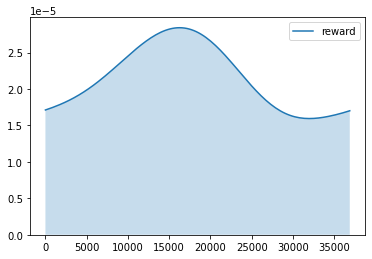

In [18]:
# top 5 most/least rewarding offers to all customers

display(transcript.groupby('offer_id').sum().sort_values(by='reward',ascending=False)['reward'][:10])
sns.kdeplot(transcript.groupby('offer_id').sum().sort_values(by='reward',ascending=False)['reward'], shade=True, cut=0)

- The two most rewarding offers are "ae264e3637204a6fb9bb56bc8210ddfd", and "4d5c57ea9a6940dd891ad53e9dbe8da0". They each rewards total of \\$36880 and \\$33310 to the particiatants.
- When it comes to rewarding amount, most offers generate total rewards amount from around \\$17000 to \\$21000 to all customers.

person
3c8d541112a74af99e88abbd0692f00e    1608.69
f1d65ae63f174b8f80fa063adcaa63b7    1365.66
ae6f43089b674728a50b8727252d3305    1327.74
626df8678e2a4953b9098246418c9cfa    1321.42
73afdeca19e349b98f09e928644610f8    1319.97
52959f19113e4241a8cb3bef486c6412    1292.86
ad1f0a409ae642bc9a43f31f56c130fc    1258.19
d240308de0ee4cf8bb6072816268582b    1251.99
946fc0d3ecc4492aa4cc06cf6b1492c3    1232.40
6406abad8e2c4b8584e4f68003de148d    1211.76
Name: amount, dtype: float64

person
693e16a8afe24167b2e8e605498e7d42    0.0
713a1ea744ee4267a741645078845eac    0.0
7121aa6e546f47beb9fe2642fc49a4d1    0.0
70cb9657490647978664229c0fd3ecbf    0.0
cbe6e55ecf54476db7504aee4ab74d0b    0.0
cc1891e307dd48f49bdb894ede98f8a6    0.0
7002342f48214d5bb4d7ec33e0c9e3db    0.0
6fb2a442ccb44db9a4deb57f00a1fa7e    0.0
6f8046e4e6c14ea699cfb964d67f5e4f    0.0
0c96e5392702403b8db72f8781784abe    0.0
Name: amount, dtype: float64

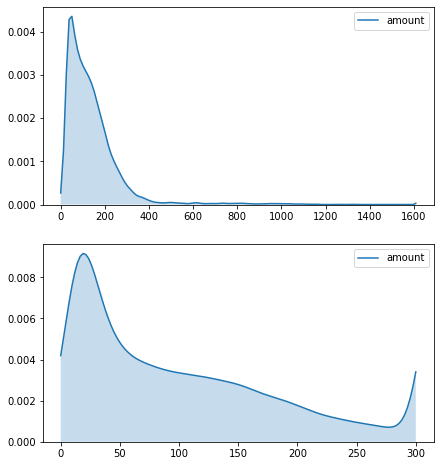

In [19]:
# Top 10 customers who spent the largest/smallest amount of money

display(transcript.groupby('person').sum().sort_values(by='amount',ascending=False)['amount'][:10])
display(transcript.groupby('person').sum().sort_values(by='amount',ascending=True)['amount'][:10])

fig, ax =plt.subplots(2,1, figsize=(7,8))
sns.kdeplot(transcript.groupby('person').sum().sort_values(by='amount',ascending=False)['amount'], ax=ax[0], shade=True, cut=0)
sns.kdeplot(transcript.groupby('person').sum().query('amount < 300')['amount'], ax=ax[1], shade=True, cut=0)

- Looking at top 10 customers in terms of who made the largest total amount of purchase, most of them spent about \\$1300.
- The majority of the population spent about less than \\$50 dollars during the testing period. Once we pass the \\$50 benchmark, we see a clear decreasing trend in terms of purchasing amount that the participating customers made. 

person
d3209835a40a423fbf2c967218d00bcd    55.0
e130d81685ae45deb9fbf6d416084a1d    50.0
e51350fc39f54b47842fa13c49f7400b    50.0
bd920b7b033d42fb9d97be92343a9aef    50.0
7f27070d07eb44cb89b9a547074ca343    50.0
c93f9619abd642a684bd79953cef992c    50.0
1acb3e87e3304271a3c917cc80a53780    50.0
fff29fb549084123bd046dbc5ceb4faa    47.0
38999f1dd0d44dc2b2f8278d2409681a    47.0
2a13705c79fd44bc91207deb5374b7ad    47.0
Name: reward, dtype: float64

person
7fc6d7fa5f6f43dc919b043f612dda50    0.0
ad733e0dfb4a41c7a5f667ffe726c7a5    0.0
2ec6176c4b194d20ab83a27a6560d79c    0.0
5e9c83e8ab4d4e9ca83f3256d83ca756    0.0
2eccae70cd904a3dacec70a38016cb8c    0.0
2ed61a019cb546b4ab9c6d3bd4a792f8    0.0
d6df308b05364b2b9ed238bbf838b3d3    0.0
2ed795282792477091388a62bcdfd4ad    0.0
ad75ad314b534ed09cc1a808a7ef3876    0.0
2eea41ee8697476d9bd837d63333182c    0.0
Name: reward, dtype: float64

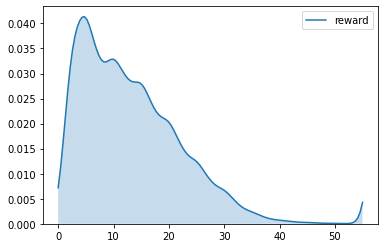

In [20]:
# Top 10 customers who receives the most/least amount of rewards

display(transcript.groupby('person').sum().sort_values(by='reward',ascending=False)['reward'][:10])
display(transcript.groupby('person').sum().sort_values(by='reward',ascending=True)['reward'][:10])

sns.kdeplot(transcript.groupby('person').sum().sort_values(by='reward',ascending=False)['reward'],shade=True, cut=0)

- Looking at top 10 customers in terms of who receives the highest rewarding amount in total, most of them receives about \\$50 dollars.
- The majority of the population receives about less than \\$10 dollars. Once we pass the \\$10 benchmark, we see a clear decreasing trend in terms of rewarding amount given to the participating customers.

### 1.2 Initial conclusion - transcript

Summary:
- The total number of events in this dataset is 306534, this could indicate that all people included in the profile dataset must be assigned to an event.
- From most frequent to least frequent, the rewards amount to each individual person are likely to be \\$5 dollars, followed by \\$2, then \\$10 dollars.
- For a single tranaction, there are more customers who spent less than about \\$10 dollars, and less customers who spend more than about \\$20 dollars. Please note that these numbers are the results of only looking at tranactions one at a time. If a customer who spent \\$10 dollars today and \\$20 dollars tomorrow, these transactions will be viewed as two different transactions.
- In terms of the type of events (opened, transaction, completed) that could happen to a customer, there are customers who initiated as many as 45 such events, and there are customers who initiated as less as 1 such event.
- The majority of the population initiate about 10 events, all types of events are considered except "offer received" since this is a passive action.
- In terms of the number of offers received, some people got as many as 6, while others got as less as 1.
- The majority of the population receives either 4 or 5 offers during the data gathering period.
- Offers that got completed the most times are "fafdcd668e3743c1bb461111dcafc2a4", and "2298d6c36e964ae4a3e7e9706d1fb8c2", with 5317 completions and 5156 completions repectively.
- The two most rewarding offers are "ae264e3637204a6fb9bb56bc8210ddfd", and "4d5c57ea9a6940dd891ad53e9dbe8da0". They each rewards total of \\$36880 and \\$33310 to the particiatants.
- When it comes to rewarding amount, most offers has total rewards amount centered around \\$17000.
- Looking at top 10 customers in terms of who made the largest total amount of purchase, most of them spent about \\$1300.
- The majority of the population spent less than about \\$50 dollars during the testing period. Once we pass the \\$50 benchmark, we see a clear decreasing trend in terms of purchasing amount that the participating customers made.
- Looking at top 10 customers in terms of who receives the highest rewarding amount in total, most of them receives about \\$50 dollars.
- The majority of the population receives about less than \\$10 dollars. Once we pass the \\$10 benchmark, we see a clear decreasing trend in terms of rewarding amount given to the participating customers.


Conclusion:
1. customer who does/doesn't made purchases:
    - There are 17000 unique customers from the profile dataset, however in the transcript dataset, there are 306534 customers. We need to further investigate into the following scenarios:
            a. customers who made no purchase because they never viewed any offer.
            b. customers who made no purchase after received and viewed the offers.
            c. customers who made single/multiple purchase after receiving the offers, regardless whether the offers are viewed or not.
            d. customers who made single/multiple purchase even when no offers are being sent to them.
2. single transaction:
    - Regarless of whether the same customer made multiple purchases or not, most transaction amounts, counted as one at a time,  centered around \\$10 dollars.
3. active customers:
    - The majority of the population will initiated about 10 events while highly active customers could initiate as many as about 45 events. We need to label the customers who are highly active in regards to all type of events except "offer received".
4. targeted customers:
    - The majority of the population receive about 4-6 offers, while some receive as less as 1 offer.
5. offer completion rate:
    - All offers got received about 7000 times for the entire customer population.
    - Offer completion rates (informational offers are excluded since they don't generate revenue):
            a. 9b98b8c7a33c4b65b9aebfe6a799e6d9: 56%
            b. 0b1e1539f2cc45b7b9fa7c272da2e1d7: 44%
            c. ae264e3637204a6fb9bb56bc8210ddfd: 48%
            d. 2298d6c36e964ae4a3e7e9706d1fb8c2: 67%
            e. 2906b810c7d4411798c6938adc9daaa5: 52%
            f. fafdcd668e3743c1bb461111dcafc2a4: 70%
            g. 4d5c57ea9a6940dd891ad53e9dbe8da0: 44%
            h. f19421c1d4aa40978ebb69ca19b0e20d: 57%
6. offers nature:
    - Offers "fafdcd668e3743c1bb461111dcafc2a4" and "2298d6c36e964ae4a3e7e9706d1fb8c2" are the most successful offers in terms of having most number of completions. However, they are also the ones with lower rewarding amounts generated to all participants. This could potentially due to that these offers have lower difficulty level required to complete, thus they are less rewarding by design.
    - Conversely, offer "4d5c57ea9a6940dd891ad53e9dbe8da0", and "ae264e3637204a6fb9bb56bc8210ddfd" got completed with the fewest number of times, but they generated the highest amount of rewards. Intuitively thinking, these offers might have a higher difficulty level to complete, thus highly rewarding.
    - Most offers generate total of around \\$17000 dollars to all participants.
7. total transaction made/rewards received by person:
    - The majority of the population spent less than about \\$50 dollars during the testing period.
    - The majority of the population receives about less than \\$10 dollars.

## 2. Cross section analysis

### 2.1 portfolio + transcript

In [21]:
# portfolio dataset at a first glance

display(portfolio.head(10), portfolio.shape)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


(10, 6)

In [22]:
# join the two datasets

portfolio.set_index('id', inplace=True)
temp = transcript.groupby(['offer_id', 'event']).count()['person'].reset_index().set_index('offer_id')
portfolio_transcript = portfolio.join(temp)
portfolio_transcript = portfolio_transcript.pivot(columns='event', values='person')
portfolio_transcript = portfolio.join(portfolio_transcript).reset_index().rename(columns={'offer completed': 'offer_completed',
                                                                                          'offer received': 'offer_received',
                                                                                          'offer viewed': 'offer_viewed'})
portfolio_transcript['offer_names'] = range(1,11)
display(portfolio_transcript)

,id,channels,difficulty,duration,offer_type,reward,offer_completed,offer_received,offer_viewed,offer_names
0,ae264e3637204a6fb9bb56bc8210ddfd,"[email, mobile, social]",10,7,bogo,10,3688.0,7658.0,6716.0,1
1,4d5c57ea9a6940dd891ad53e9dbe8da0,"[web, email, mobile, social]",10,5,bogo,10,3331.0,7593.0,7298.0,2
2,3f207df678b143eea3cee63160fa8bed,"[web, email, mobile]",0,4,informational,0,NaN,7617.0,4144.0,3
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,"[web, email, mobile]",5,7,bogo,5,4354.0,7677.0,4171.0,4
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,"[web, email]",20,10,discount,5,3420.0,7668.0,2663.0,5
5,2298d6c36e964ae4a3e7e9706d1fb8c2,"[web, email, mobile, social]",7,7,discount,3,5156.0,7646.0,7337.0,6
6,fafdcd668e3743c1bb461111dcafc2a4,"[web, email, mobile, social]",10,10,discount,2,5317.0,7597.0,7327.0,7
7,5a8bc65990b245e5a138643cd4eb9837,"[email, mobile, social]",0,3,informational,0,NaN,7618.0,6687.0,8
8,f19421c1d4aa40978ebb69ca19b0e20d,"[web, email, mobile, social]",5,5,bogo,5,4296.0,7571.0,7264.0,9
9,2906b810c7d4411798c6938adc9daaa5,"[web, email, mobile]",10,7,discount,2,4017.0,7632.0,4118.0,10


The type of offer with the highest average number of viewes is bogo
The type of offer with the highest average number of completions is discount


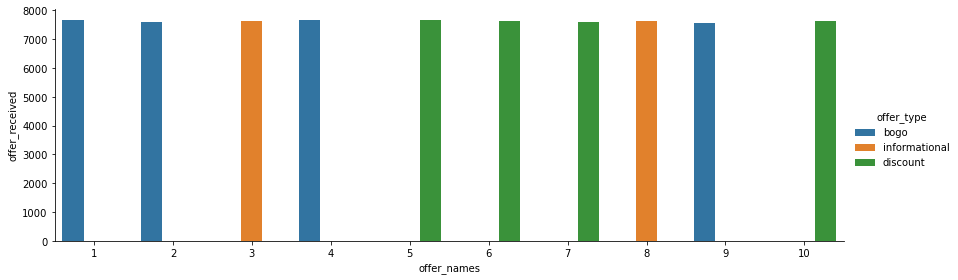

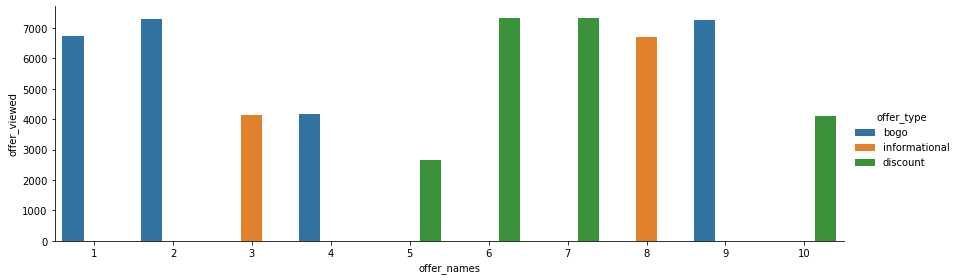

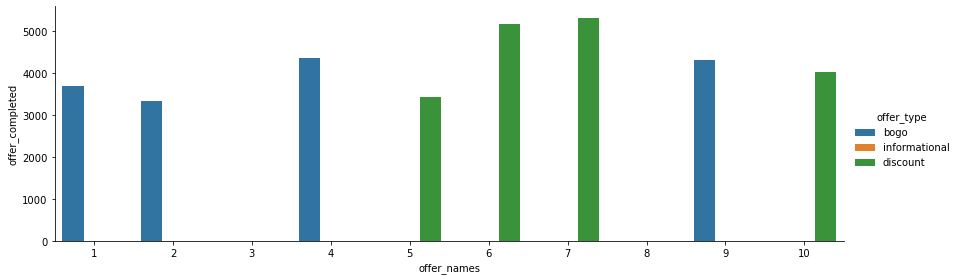

In [23]:
# visualize the newly joined datasets

sns.catplot(x="offer_names", y="offer_received", hue="offer_type", kind="bar", data=portfolio_transcript, height=4, aspect=3)
sns.catplot(x="offer_names", y="offer_viewed", hue="offer_type", kind="bar", data=portfolio_transcript, height=4, aspect=3)
sns.catplot(x="offer_names", y="offer_completed", hue="offer_type", kind="bar", data=portfolio_transcript, height=4, aspect=3)

print('The type of offer with the highest average number of viewes is', portfolio_transcript.groupby('offer_type').mean()[['offer_viewed']].idxmax()[0])
print('The type of offer with the highest average number of completions is', portfolio_transcript.groupby('offer_type').mean()[['offer_completed']].idxmax()[0])

- Observe from the first graph, all types of offers got sent equally to most (perhaps not all) of the customers. Again, this result is in sync with one of the observations made from last section (1.2).
- Observe from the second graph, the type of offer with the highest average number of viewes is "bogo".
- Observe from the third graph, the type of offer with the highest average number of completions is "discount".

The type of offer with the longest duration (averaged) to complete is discount
The type of offer with the highest difficulty level (averaged) to complete is discount


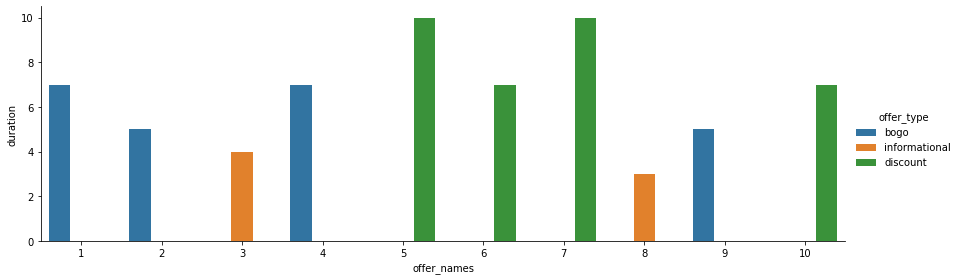

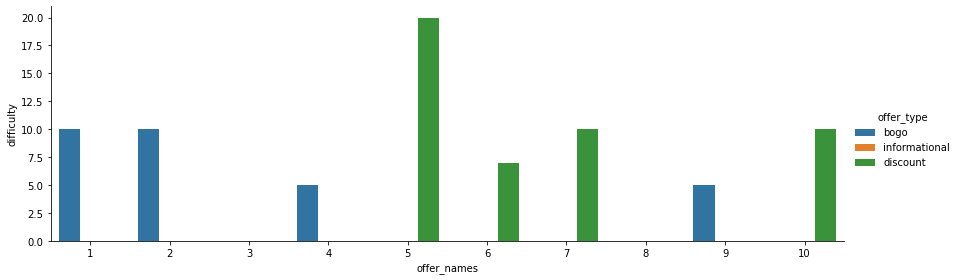

In [24]:
sns.catplot(x="offer_names", y="duration", hue="offer_type", kind="bar", data=portfolio_transcript, height=4, aspect=3)
sns.catplot(x="offer_names", y="difficulty", hue="offer_type", kind="bar", data=portfolio_transcript, height=4, aspect=3)

print('The type of offer with the longest duration (averaged) to complete is', portfolio_transcript.groupby('offer_type').mean()[['duration']].idxmax()[0])
print('The type of offer with the highest difficulty level (averaged) to complete is', portfolio_transcript.groupby('offer_type').mean()[['difficulty']].idxmax()[0])

- We observe that offer type "discount" has both the longest duration and the highest difficulty level to complete.

In [25]:
# Determine the degree of influence for each offers: offer_viewed / offer_received

portfolio_transcript['influence'] = portfolio_transcript.offer_viewed / portfolio_transcript.offer_received
portfolio_transcript.groupby('offer_type').mean()['influence']

offer_type
bogo             0.835225
discount         0.702726
informational    0.710918
Name: influence, dtype: float64

- The 'bogo' offers clearly has a higher degree of influence than the rest offer types.

### 2.1 Initial conclusion - portfolio + transcript

Summary:
- The type of offer with the highest average number of viewes is bogo
- The type of offer with the highest average number of completions is discount
- The type of offer with the longest duration to complete is discount
- The type of offer with the highest difficulty level to complete is discount
- The 'bogo' offers clearly has a higher degree of influence than the rest offer types.

Conclusion:
- The "bogo" offers have the highest average number of views, so as a result, this offer type also has the highest degree of influence.
- The "discount" offers took the longest to complete, but their averaged number of completion is also the highest.

### 2.2 profile + transcript

In [26]:
# join the two datasets: profile + transcript
# first, add the following columns to include all scenarios:
    # offer_received,
    # offer_viewed,
    # offer_completed, 
    # offer_received_viewed_completed, 
    # offer_not_received_completed, 
    # offer_not_viewed_completed

for each in ['offer_received', 'offer_viewed', 'offer_completed','offer_received_viewed_completed','offer_not_received_completed',
            'offer_not_viewed_completed']:
    profile.insert(profile.shape[1], column=each, value=np.zeros_like(profile.index))

# updating the offer received, viewed, and completed

profile = profile.join(transcript.query('event=="offer received"').groupby('person').count()['event'])
profile.offer_received.update(profile.pop('event'))
profile = profile.join(transcript.query('event=="offer viewed"').groupby('person').count()['event'])
profile.offer_viewed.update(profile.pop('event'))
profile = profile.join(transcript.query('event=="offer completed"').groupby('person').count()['event'])
profile.offer_completed.update(profile.pop('event'))

# update offer_received_viewed_completed

received_viewed_completed_idx = profile.query('offer_received!=0 and offer_viewed!=0 and offer_completed!=0').index.to_list()
profile.loc[received_viewed_completed_idx, 'offer_received_viewed_completed'] = transcript.query('event=="offer completed"').groupby('person').count().loc[received_viewed_completed_idx]['event']

# update offer_not_received_completed

not_received_completed_idx = profile.query('offer_received==0 and offer_completed!=0').index.to_list()
profile.loc[not_received_completed_idx, 'offer_not_received_completed'] = transcript.query('event=="offer completed"').groupby('person').count().loc[not_received_completed_idx]['event']

# update offer_not_viewed_completed

not_viewed_completed_idx = profile.query('offer_received!=0 and offer_viewed==0 and offer_completed!=0').index.to_list()
profile.loc[not_viewed_completed_idx, 'offer_not_viewed_completed'] = transcript.query('event=="offer completed"').groupby('person').count().loc[not_viewed_completed_idx]['event']

In [27]:
profile.head(10)

,age,became_member_on,gender,income,age_group,became_member_year,became_member_month,became_member_day,became_member_weekday,offer_received,offer_viewed,offer_completed,offer_received_viewed_completed,offer_not_received_completed,offer_not_viewed_completed
id,,,,,,,,,,,,,,,
68be06ca386d4c31939f3a4f0e3dd783,118,2017-02-12,None,NaN,NaN,2017,2,12,6,5,5,2,2,0,0
0610b486422d4921ae7d2bf64640c50b,55,2017-07-15,F,112000.0,50-59,2017,7,15,5,2,0,1,0,0,1
38fe809add3b4fcf9315a9694bb96ff5,118,2018-07-12,None,NaN,NaN,2018,7,12,3,2,2,0,0,0,0
78afa995795e4d85b5d9ceeca43f5fef,75,2017-05-09,F,100000.0,70-79,2017,5,9,1,4,4,3,3,0,0
a03223e636434f42ac4c3df47e8bac43,118,2017-08-04,None,NaN,NaN,2017,8,4,4,5,3,0,0,0,0
e2127556f4f64592b11af22de27a7932,68,2018-04-26,M,70000.0,60-69,2018,4,26,3,4,3,2,2,0,0
8ec6ce2a7e7949b1bf142def7d0e0586,118,2017-09-25,None,NaN,NaN,2017,9,25,0,5,5,0,0,0,0
68617ca6246f4fbc85e91a2a49552598,118,2017-10-02,None,NaN,NaN,2017,10,2,0,5,4,0,0,0,0
389bc3fa690240e798340f5a15918d5c,65,2018-02-09,M,53000.0,60-69,2018,2,9,4,6,6,5,5,0,0


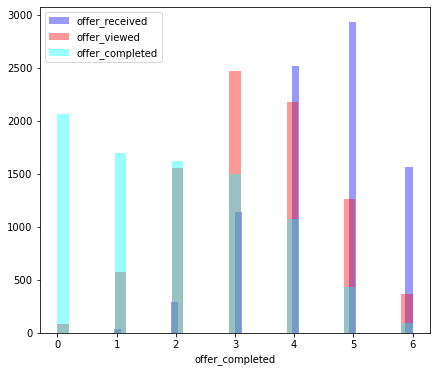

In [28]:
# for the male group, comparing number of offer_received, offer_viewed, and offer_completed

fig, ax =plt.subplots(figsize=(7,6))
sns.distplot( profile.loc[profile["gender"]=='M', 'offer_received'] , color="blue", label="offer_received", ax=ax, kde=False)
sns.distplot( profile.loc[profile["gender"]=='M', 'offer_viewed'] , color="red", label="offer_viewed", ax=ax, kde=False)
sns.distplot( profile.loc[profile["gender"]=='M', 'offer_completed'] , color="cyan", label="offer_completed", ax=ax, kde=False)
plt.legend()

- For most of the male customers, they received about 4-6 offers while only view about 3-4 ones and complete from 0-3 offers.

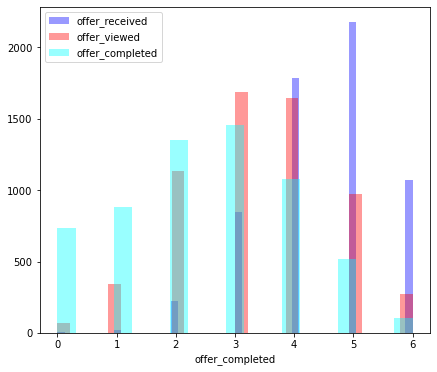

In [29]:
# for the female group, comparing number of offer_received, offer_viewed, and offer_completed

fig, ax =plt.subplots(figsize=(7,6))
sns.distplot( profile.loc[profile["gender"]=='F', 'offer_received'] , color="blue", label="offer_received", ax=ax, kde=False)
sns.distplot( profile.loc[profile["gender"]=='F', 'offer_viewed'] , color="red", label="offer_viewed", ax=ax, kde=False)
sns.distplot( profile.loc[profile["gender"]=='F', 'offer_completed'] , color="cyan", label="offer_completed", ax=ax, kde=False)
plt.legend()

- For the most female customers, they receive about 4-6 offers, and likely to view about 3-4 ones. But most female customers complete about 2-4 offers.

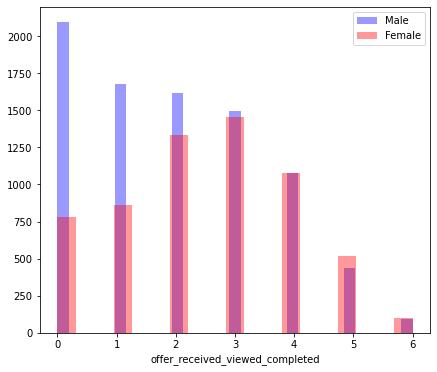

In [30]:
# compare the number of customers who followed all stages: offer received -> offer viewed -> offer completed
# make comparison between male and female groups.

fig, ax =plt.subplots(figsize=(7,6))
sns.distplot( profile.loc[profile["gender"]=='M', 'offer_received_viewed_completed'] , color="blue", label="Male", kde=False, ax=ax)
sns.distplot( profile.loc[profile["gender"]=='F', 'offer_received_viewed_completed'] , color="red", label="Female", kde=False, ax=ax)
plt.legend()

- When considering offers that got completed after being received and viewed, males customers tend to complete about 0-3 such offers. While female customers, on the other hand, tend to complete from 2-4 of such offers. 

Customer Profiling:
- customers who made no purchase because they never viewed any offer.
- customers who made no purchase after received and viewed the offers.
- customers who made single/multiple purchase after receiving the offers, regardless whether the offers are viewed or not.
- customers who made single/multiple purchase even when no offers are being sent to them.

In [31]:
# to do customer profiling, first we need to append amount, and reward information to the profile dataset

profile.insert(profile.shape[1], column="amount_spent", value=np.zeros_like(profile.index))
profile = profile.join(transcript.query('amount>=0').groupby('person').sum()['amount'])
profile.amount_spent.update(profile.pop('amount'))

profile.insert(profile.shape[1], column="reward_received", value=np.zeros_like(profile.index))
profile = profile.join(transcript.query('reward>=0').groupby('person').sum()['reward'])
profile.reward_received.update(profile.pop('reward'))

# customers with no purchases
    # customers who made no purchase because they never viewed any offer
    # customers who made no purchase after received and viewed the offers
    
print('There are %.0f customers who made no purchases during the testing period.' % (profile.query('amount_spent==0').shape[0]))
print('Out of these 422 customers, %.0f customers did not receive any offers.' % (profile.query('amount_spent==0 and offer_received==0').shape[0]))
print('Out of these 422 customers, %.0f customers did not view any offers.' % (profile.query('amount_spent==0 and offer_viewed!=0').shape[0]))
print('Out of these 422 customers, %.0f customers viewed the offers but still did not make purchase.' % (profile.query('amount_spent==0 and offer_viewed==0').shape[0]), '\n')

idx1 = profile.query('amount_spent==0 and offer_viewed!=0').index
idx2 = profile.query('amount_spent==0 and offer_viewed==0').index 
profile.loc[idx1, 'no_purchase'] = 'no_purchase_no_view'
profile.loc[idx2, 'no_purchase'] = 'no_purchase_did_view'
profile['no_purchase'].fillna('made_purchase', inplace=True)

# customers with purchases
    # customers who made single/multiple purchase after receiving the offers, and viewed
    # customers who made single/multiple purchase after receiving the offers, but not viewed
    # customers who made single/multiple purchase even when no offers are being sent to them

print('There are %.0f customers who made purchases during the testing period.' % (profile.query('amount_spent>0').shape[0]))
print('Out of these 16578 customers, %.0f customers received offers and viewed them.' % (profile.query('amount_spent>0 and offer_viewed!=0').shape[0]))
print('Out of these 16578 customers, %.0f customers received offers but did not view them.' % (profile.query('amount_spent>0 and offer_received!=0 and offer_viewed==0').shape[0]))
print('Out of these 16578 customers, %.0f customers did not receive any offers.' % (profile.query('amount_spent>0 and offer_received==0').shape[0]))

idx1 = profile.query('amount_spent>0 and offer_viewed!=0').index
idx2 = profile.query('amount_spent>0 and offer_received!=0 and offer_viewed==0').index 
idx3 = profile.query('amount_spent>0 and offer_received==0').index 
profile.loc[idx1, 'with_purchase'] = 'purchased_viewed'
profile.loc[idx2, 'with_purchase'] = 'purchased_received_no_view'
profile.loc[idx3, 'with_purchase'] = 'purchased_not_received'
profile['with_purchase'].fillna('no_purchase', inplace=True)

There are 422 customers who made no purchases during the testing period.
Out of these 422 customers, 0 customers did not receive any offers.
Out of these 422 customers, 412 customers did not view any offers.
Out of these 422 customers, 10 customers viewed the offers but still did not make purchase. 

There are 16578 customers who made purchases during the testing period.
Out of these 16578 customers, 16422 customers received offers and viewed them.
Out of these 16578 customers, 150 customers received offers but did not view them.
Out of these 16578 customers, 6 customers did not receive any offers.


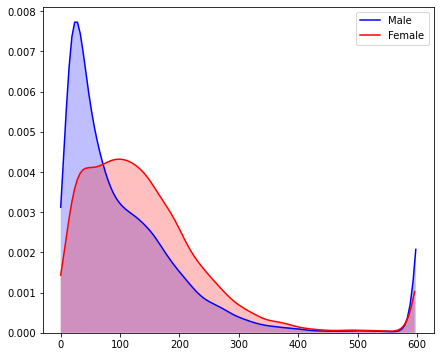

In [32]:
# visualize male/female customers total spent amount

fig, ax =plt.subplots(figsize=(7,6))
sns.kdeplot(profile.query('gender=="M" and amount_spent<600')['amount_spent'], color="blue", shade=True, ax=ax, cut=0, label="Male")
sns.kdeplot(profile.query('gender=="F" and amount_spent<600')['amount_spent'], color="red", shade=True, ax=ax, cut=0, label="Female")
plt.legend()

- It's observed that most of the female population has much higher total spent amount that centers around at \\$100 dollars, whereas for the male population, most of the total spent amount centers around at less than \\$50 dollars.

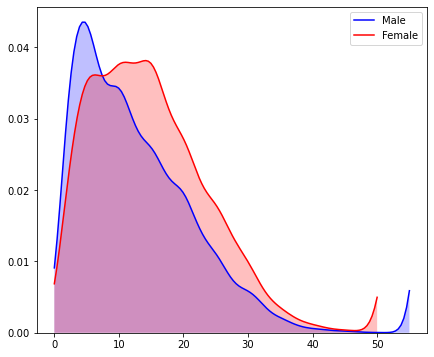

In [33]:
# visualize male/female customers total number of rewards received

fig, ax =plt.subplots(figsize=(7,6))
sns.kdeplot(profile.query('gender=="M"')['reward_received'], color="blue", shade=True, ax=ax, cut=0, label="Male")
sns.kdeplot(profile.query('gender=="F"')['reward_received'], color="red", shade=True, ax=ax, cut=0, label="Female")
plt.legend()

- As a result, the most of the female population receives more rewards than the male population does.

In [34]:
# determine how the "with_purchase" column affect customers total spent amount
# note that the "with_purchase" column includes the following categories: 
    # customers made purchase after received offers and viewed them, - purchased_viewed
    # customers made purchase after received offers but did not view them, - purchased_received_no_view
    # customers made purchase but did not receive any offers - purchased_not_received

profile.amount_spent = profile.amount_spent.astype('float64')
profile.reward_received = profile.reward_received.astype('float64')
profile.groupby('with_purchase').median()['amount_spent']

with_purchase
no_purchase                    0.00
purchased_not_received        44.63
purchased_received_no_view    23.71
purchased_viewed              73.33
Name: amount_spent, dtype: float64

- Clearly, we see that the median purchase amount for thoes customers who received and viewed the offers is higher than the rest of the categories. So, customer who follow all stages, offer received, offer viewed and offer completed, make them really valuable. 

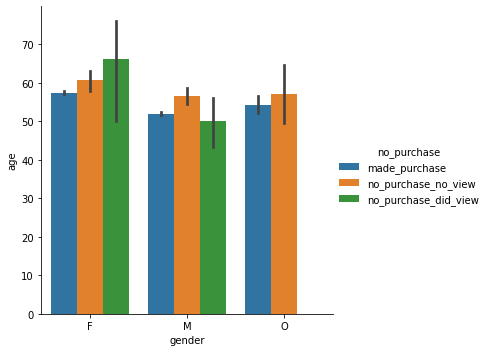

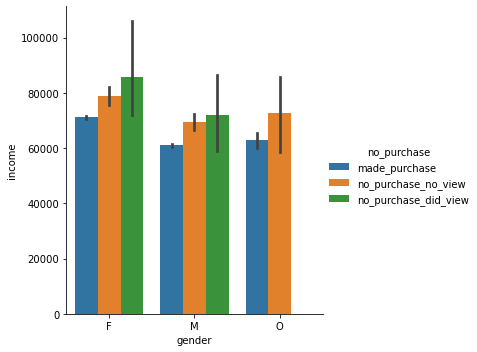

In [35]:
# visualize demographics based on the "no_purchase" column

sns.catplot(x="gender", y="age", hue="no_purchase", kind="bar", data=profile)
sns.catplot(x="gender", y="income", hue="no_purchase", kind="bar", data=profile)

- We observe that within the customers who made no purchases, the majority comes from female, high income pupolation. That being said, if the offers we sent are mainly for informational purposes, that's fine. But, we should really focusing on senting promotion offers such as "bogo" and "discounts because we've observed that this particular group of customers has higher total spent amount and they are likely to complete more offers than the male customers across all ages and income levels. 

### 2.2 Initial conclusion - profile + transcript

Summary:
- For most of the male customers, they received about 4-6 offers while only view about 3-4 ones and complete from 0-3 offers.
- For the most female customers, they receive about 4-6 offers, and likely to view about 3-4 ones. But most female customers complete about 2-4 offers.
- When considering the offers that got completed only after being received and viewed, males customers tend to complete about 0-3 such offers. While female customers, on the other hand, tend to complete from 2-4 of such offers.
- There are 422 customers who made no purchases during the testing period.
    - Out of these 422 customers, 0 customers did not receive any offers.
    - Out of these 422 customers, 412 customers did not view any offers.
    - Out of these 422 customers, 10 customers viewed the offers but still did not make purchase.
- There are 16578 customers who made purchases during the testing period.
    - Out of these 16578 customers, 16422 customers received offers and viewed them.
    - Out of these 16578 customers, 150 customers received offers but did not view them.
    - Out of these 16578 customers, 6 customers did not receive any offers.
- It's observed that most of the female population has much higher total spent amount that centers around at \\$100 dollars, whereas for the male population, most of the total spent amount centers around at less than \\$50 dollars.
- As a result, the most of the female population receives more rewards than the male population does.
- Clearly, we see that the median purchase amount for thoes customers who received and viewed the offers is higher than the rest of the categories. So, customer who follow all stages, offer received, offer viewed and offer completed, make them really valuable.

Conclusion:
- Female customers receive and view about the same amount of offers, but they tend to complete more offers than the male customers do. We also observe that the female population has much higher total spent amount that centers around at \\$100 dollars; whereas, the male population's most frequent total spent amount centers at less than \\$40-\\$50 dollars.
- For customers who did not make any purchase, most of them did receive the offers, but never viewed them. We should design offers that are likely to be viewed.
- For customers who made at least one purchase, most of them followed all stages which include receive and view the offer first, then complete the offer. This sequence of actions is really valuable because the median purchase amount for this type of offer completion is higher than the rest of the scenarios. So, customer that follow all stages make them really valuable. We also observe that female customers tend to complete more such offers than male customers do.
- We observe that within the customers who made no purchases, the majority comes from female, high income pupolation. That being said, if the offers we sent are mainly for informational purposes, that's fine. But, we should really focusing on senting promotion offers such as "bogo" and "discounts because we've observed that this particular group of customers has higher total spent amount and they are likely to complete more offers than the male customers across all ages and income levels.

## Component conclusion

Questions to answer
1.	What are the success rates for each offer?
2.	What statements can we make when comparing the bogo and discount offers?
3.	When people make certain decisions about the offers, are there any common characteristics that these people share? 

Findings:
1. All offers got received about 7000 times for the entire customer population. However, offer "fafdcd668e3743c1bb461111dcafc2a4" and "2298d6c36e964ae4a3e7e9706d1fb8c2" are the most successful ones in terms of offer completion rates with 70% and 67% respectively.
2. The "bogo" offers have the highest average number of views, so as a result, this offer type also has the highest degree of influence. The "discount" offers took the longest to complete, but their averaged number of completions is the highest.
3. Female customers receive and view about the same amount of offers, but they tend to complete more offers than the male customers do. We also observe that the female population has much higher individual total spent amount that centers around at \\$100 dollars; whereas, the male population's most frequent total spent amount centers at less than \\$40-\\$50 dollars.
    - However, We also observe that within the customers who made no purchases, the majority comes from female. Female customers have higher median income than male customers do. That being said, if the offers we sent are mainly for informational purposes, that's fine. But, we should be foucing on sending promotion offers such as "bogo" and "discounts because we've observed that this particular group of customers has higher total spent amount and they are likely to complete more offers than the male customers across all ages and income levels.
    - For customers who did not make any purchase, most of them did receive the offers, but never viewed them. We should design offers that are likely to be viewed.
    - For customers who made at least one purchase, most of them followed all stages which include receive and view the offer first, then complete the offer. This sequence of actions is desired because the median purchase amount, for customers who followed all stages, is higher than the rest of the scenarios. So, customer that follow all stages make them valuable. 

In [36]:
# prepare the datasets to be used in the next component

import os
data_dir = '../Data/Processed'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

transcript.to_csv(os.path.join(data_dir, 'transcript_processed.csv'), header=True, index=True)
profile.to_csv(os.path.join(data_dir, 'profile_processed.csv'), header=True, index=True)
portfolio_transcript.to_csv(os.path.join(data_dir, 'portfolio_processed.csv'), header=True, index=True)